# The SciPy ecosystem

SciPy is short for "Scientific Tools for Python"

SciPy is a Python-based ecosystem of open-source software for mathematics, science, and engineering.

Homepage: https://scipy.org/

In particular, these are some of the core packages (not all of these are technically a part of SciPy):
* **Python**, a general purpose programming language. It is interpreted and dynamically typed and is very suited for interactive work and quick prototyping, while being powerful enough to write large applications in.
* **NumPy**, *the* fundamental package for numerical computation. It defines an numerical array (and matrix) type and the basic operations using them.
* **The SciPy library**, a collection of numerical algorithms and domain-specific toolboxes, including signal processing, optimization, statistics and much more.
* **Matplotlib**, a mature and popular plotting package, that provides publication-quality 2D plotting as well as rudimentary 3D plotting
* **pandas**, providing high-performance, easy to use data structures.
* **SymPy**, for symbolic mathematics and computer algebra.
* **IPython**, a rich interactive interface, letting you quickly process data and test ideas. The IPython notebook works in your web browser, allowing you to document your computation in an easily reproducible form.
* **nose**, a framework for testing Python code.

There are also some additional packages included in the SciPy ecosystem, like **MayaVI** and **cython**.

As you can see, we already touch upon a few of these.

When we talk about **SciPy** below, we are always talking about **the SciPy library**!

# The SciPy library

https://scipy.org/scipylib/index.html

## SciPy packages

The SciPy library comes with a large range of packages:

- **cluster**, Clustering algorithms
- **constants**, Physical and mathematical constants
- **fftpack**, Discrete FFT routines
- **integrate**, Integration and ODE solvers
- **interpolate**, Spline interpolation
- **io**, Input output routines
- **linalg**, Linear algebra
- **misc**, Miscellaneous routines
- **ndimage**, N-dimensional image processing
- **odr**, Orthogonal distance regression
- **optimize**, Optimization and root finding
- **signal**, Signal processing
- **sparse**, Sparse matrices and implicit matrix routines
- **sparse.linalg**, parse linear algebra
- **sparse.csgraph**, Compressed Sparse Graph Routines
- **spatial**, Spatial data structures and algorithms
- **special**, Special functions
- **stats**, Statistical distribution and functions
- **stats.mstats**, Statistical functions for masked arrays
- **weave**, C/C++ integration


In this lecture we will show selected examples from these:

- Special functions
- Numerical integration
- Solving Ordinary Differential Equations (ODE:s)
- Spline interpolation and smoothing
- Optimization and root finding
- Sparse matrix types 
- Implicit matrix algorithms, linear system solvers and eigenvalue calc
- Statistics
- Signal processing
- Image processing and analysis
- File I/O

## Special Functions

Special functions in the **scipy.special** module include functions for:
* airy
* elliptic
* bessel
* gamma
* beta
* hypergeometric
* parabolic cylinder
* mathieu
* spheroidal wave
* struve
* kelvin
* ...

For a complete list see the Scipy Reference Manual http://docs.scipy.org/doc/scipy/reference/special.html

 Example: Spherical Bessel functions of 1st kind:
 (Bessel functions are mainly used when dealing with wave-propagation)

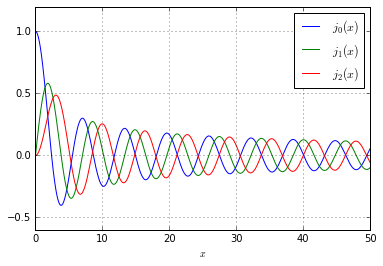

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from scipy.special import jn

x = np.linspace(0, 50, num=1e3)
for order in range(3):
    plt.plot(x, jn(order, x), label=r'$j_%i(x)$' % order)

plt.legend()
plt.grid()
plt.xlabel('$x$')
plt.show()    

## Integration

For integration and solving ordinary differential equations (ODE:s) there is the module **scipy.integrate**

This module provides methods for:
- Integrating functions, given function object
- Integrating functions, given fixed samples
- Integrators of systems of Ordinary Differential Equations (ODEs)

### Integration of function objects

To integrate function objects (i.e. subroutines/functions returning values) we use the **scipy.integrate** methods to perform the numerical integration:
* **quad(func, start, end)** - single integral
* **dblquad(func, starts, ends)** - double integral
* **tplquad(func, starts, ends)** - tripple integral
* **nquad(func, ranges)** - integration over multiple variables.
* ...

Example: 
  $$\int_{-\infty}^{\infty} \, e^{-x^2} dx = \sqrt{\pi}$$

In [2]:
from scipy import integrate, Inf

def func(x):
    return np.exp(-x**2)

# Using lamda functions, the function above can be constructed on the fly using:
# func = lambda x: np.exp(-x**2)

I, abs_err = integrate.quad(func, -Inf, Inf)
    
print('Analytic:', np.sqrt(np.pi), '\nNumeric :', I, '+/-', abs_err)

Analytic: 1.77245385091 
Numeric : 1.7724538509055159 +/- 1.4202636780944923e-08


###  Integration of fixed samples

There are a number off different approaches available for performing numerical integration of data in arrays. SciPy provides **cumtrapz**, **simps** and **romb** for this purpose.

Lets use **cumtrapz**

In [3]:
help(integrate.cumtrapz)

Help on function cumtrapz in module scipy.integrate.quadrature:

cumtrapz(y, x=None, dx=1.0, axis=-1, initial=None)
    Cumulatively integrate y(x) using the composite trapezoidal rule.
    
    Parameters
    ----------
    y : array_like
        Values to integrate.
    x : array_like, optional
        The coordinate to integrate along.  If None (default), use spacing `dx`
        between consecutive elements in `y`.
    dx : int, optional
        Spacing between elements of `y`.  Only used if `x` is None.
    axis : int, optional
        Specifies the axis to cumulate.  Default is -1 (last axis).
    initial : scalar, optional
        If given, uses this value as the first value in the returned result.
        Typically this value should be 0.  Default is None, which means no
        value at ``x[0]`` is returned and `res` has one element less than `y`
        along the axis of integration.
    
    Returns
    -------
    res : ndarray
        The result of cumulative integration o

Example: $y=x^2$
$$Y(x) = \int y(x) dx = C + \frac{x^3}{3}$$
(use $y(-2) = -3 \Rightarrow C = -1/3$)

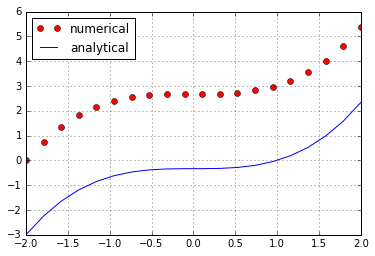

In [4]:
x = np.linspace(-2, 2, num=20)
y = x*x
Y = integrate.cumtrapz(y, x, initial=0)
C = -1/3

plt.plot(x, Y, 'ro', label='numerical')
plt.plot(x, C + 1.0/3.0 * x**3, 'b-', label='analytical')
plt.grid()
plt.legend(loc='best')
plt.show()

Why do these differ? How do you find the correct solution?

### Ordinary Differential Equations

To solve ODE:s SciPy provides the **odeint** method in the **integrate** module.

This ODE integrator is a solver for problems like:
$$\partial_t \mathbf{y} = \mathbf{f}(\mathbf{y}, t)$$

In [5]:
help(integrate.odeint)

Help on function odeint in module scipy.integrate.odepack:

odeint(func, y0, t, args=(), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, mxords=5, printmessg=0)
    Integrate a system of ordinary differential equations.
    
    Solve a system of ordinary differential equations using lsoda from the
    FORTRAN library odepack.
    
    Solves the initial value problem for stiff or non-stiff systems
    of first order ode-s::
    
        dy/dt = func(y,t0,...)
    
    where y can be a vector.
    
    Parameters
    ----------
    func : callable(y, t0, ...)
        Computes the derivative of y at t0.
    y0 : array
        Initial condition on y (can be a vector).
    t : array
        A sequence of time points for which to solve for y.  The initial
        value point should be the first element of this sequence.
    args : tuple, optional
        Extra arguments to pass to 

Example: A damped oscillator:
$$\partial_t^2 x + 2\xi \omega_0 \partial_t x + \omega_0^2 x = 0$$

with an undamped angular frequency $\omega_0$ and a damping ratio $\xi$

To solve this using **odeint**, first rewrite it to standard form:
$$
  \partial_t \mathbf{y} =
  \partial_t 
  \left[ \begin{array}{c}
    v \\ 
    x 
  \end{array} \right] = 
  \left[ \begin{array}{c}
    -2\xi \omega_0 v - \omega_0 x \\ 
    v
  \end{array} \right] = 
  \mathbf{f} ( \mathbf{y}, t )
$$  
  where  $v = \partial_t x$ and $y = \left[ \begin{array}{c}
    v \\ 
    x 
  \end{array} \right]$


Implementation:
Let the undamped angular frequency $\omega_0 = 1.0$ and the damping ratio $\xi = 0.1$

Initial conditions: $x(0) = 1.0$ and $v(0) = \partial_t x(0) = 0.0 $



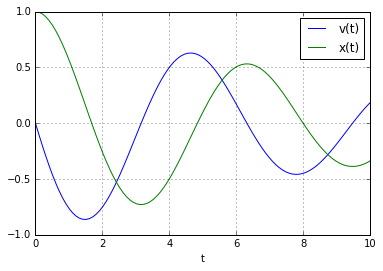

In [6]:
xi, omega0 = 0.1, 1.0 # Set constants
f = lambda y, t: [-2*xi*omega0*y[0] - omega0**2*y[1], y[0]]
    
t = np.linspace(0, 10.0, num=100)
y0 = np.array([0.0, 1.0]) # Set initial conditions
y = integrate.odeint(f, y0, t)
    
plt.plot(t, y)
plt.legend(('v(t)', 'x(t)'))
plt.xlabel('t')
plt.grid()
plt.show()

We can speed up the calculations with **odeint** by feeding it the *gradient* of the system:

For our example: $\partial_{\mathbf{y}}\mathbf{f}(\mathbf{y},t)$
$$\partial_t \mathbf{y} =
  \partial_t 
  \left[ \begin{array}{c}
    v \\ 
    x 
  \end{array} \right] = 
  \left[
  \begin{array}{cc} -2\xi \omega_0 & - \omega_0^2 \\ 1 & 0 \end{array}
  \right]
  \cdot
  \left[ \begin{array}{c}
  v \\
  x
  \end{array} \right] 
  =
  \mathbf{f} ( \mathbf{y}, t )
$$

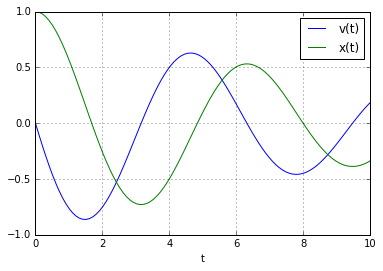

In [7]:
xi, omega0 = 0.1, 1.0 # Set constants
f = lambda y, t: [-2*xi*omega0*y[0] - omega0**2*y[1], y[0]]

gradient = lambda y, t: np.array([[-2*xi*omega0, -omega0**2], [1., 0.]])
    
t = np.linspace(0, 10.0, num=100)
y0 = np.array([0.0, 1.0]) # Set initial conditions
y = integrate.odeint(f, y0, t, Dfun=gradient)

plt.plot(t, y)
plt.legend(('v(t)', 'x(t)'))
plt.xlabel('t')
plt.grid()
plt.show()

## Interpolation

The **scipy.interpolate** module provides several methods for:
* Univariate interpolation (one variable)
* Multivariate interpolation
* 1D splines
* 2D splines

For example: For 1D spline interpolation use **UnivariateSpline(x, y, ...)** ant its methods

In [8]:
from scipy.interpolate import UnivariateSpline
help(UnivariateSpline)

Help on class UnivariateSpline in module scipy.interpolate.fitpack2:

class UnivariateSpline(builtins.object)
 |  One-dimensional smoothing spline fit to a given set of data points.
 |  
 |  Fits a spline y = spl(x) of degree `k` to the provided `x`, `y` data.  `s`
 |  specifies the number of knots by specifying a smoothing condition.
 |  
 |  Parameters
 |  ----------
 |  x : (N,) array_like
 |      1-D array of independent input data. Must be increasing.
 |  y : (N,) array_like
 |      1-D array of dependent input data, of the same length as `x`.
 |  w : (N,) array_like, optional
 |      Weights for spline fitting.  Must be positive.  If None (default),
 |      weights are all equal.
 |  bbox : (2,) array_like, optional
 |      2-sequence specifying the boundary of the approximation interval. If
 |      None (default), ``bbox=[x[0], x[-1]]``.
 |  k : int, optional
 |      Degree of the smoothing spline.  Must be <= 5.
 |      Default is k=3, a cubic spline.
 |  s : float or None, opt

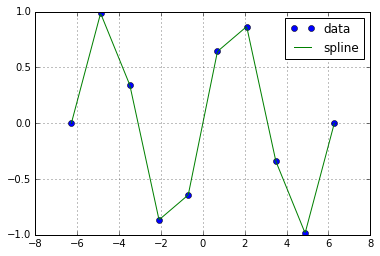

In [9]:
from scipy.interpolate import UnivariateSpline
    
x = np.linspace(-2*np.pi, 2*np.pi, num=10)
y = np.sin(x)+np.random.random(np.shape(x))*0.0
    
spline = UnivariateSpline(x, y, s=0.0, k=1)             # Create spline
x_spline = np.linspace(np.min(x), np.max(x), num=300) # Construct x-points for spine evaluation
y_spline = spline(x_spline)                           # Evaluate spline at given points
    
plt.plot(x, y, 'o', label='data')
plt.plot(x_spline, y_spline, '-', label='spline')
plt.legend()
plt.grid()
plt.show()

For 2D interpolation use **SmoothBivariateSpline(x, y, z, ...)** and its methods:

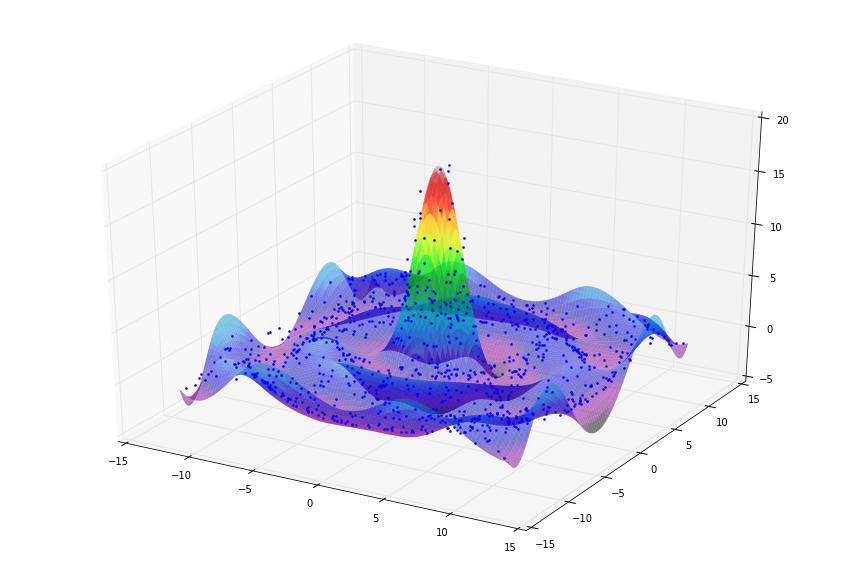

In [10]:
def hat(x, y):
    r = np.sqrt(x**2 + y**2)
    return 20.0*np.sin(r)/r
    
Npoints = 1000
points = 8. * np.pi * (np.random.random((Npoints, 2)) - 0.5) # Random grid points
x, y = points.T
values = hat(x, y)
    
tmp = np.linspace(-4*np.pi, 4*np.pi, num=100)
X, Y = np.meshgrid(tmp, tmp)
        
from scipy.interpolate import SmoothBivariateSpline

spline = SmoothBivariateSpline(x, y, values)
Z = spline(tmp, tmp)


from mpl_toolkits.mplot3d import Axes3D

plt.figure(figsize=(15,10))
ax = plt.subplot(1,1,1, projection='3d')
ax.plot(x, y, values, markersize=4, marker='.', linewidth=0)
ax.plot_surface(X, Y, Z, cmap=plt.cm.spectral, rstride=1, cstride=1, alpha=.5, linewidth=0)

plt.show()

## Linear Algebra

While we already have shown basic linear algebra using NumPY (from the **numpy.linalg** module), SciPy provides extra functionality through its linag module (in **scipy.linalg**

As a reminder, these are some of the "matrix" routines from **numpy.linalg**:
- **norm(A)**, matrix or vector norm (default 2-norm)
- **det(A)**, determinant of 2D equal dimensional arrays
- **solve(A, b)**, solves linear eq. $A \cdot \mathbf{x} = \mathbf{b}$
- **qr(A)**, QR-factorization
- **inv(A)**, **pinv(A)**, matrix inverse and pseudo inverse
- **eig(A)**, **eigvals(A)**, **eigh(A)**, **eigvalsh(A)**, eigenvalues and eigenvectors of $A$ h is for hermitian case $A^\dagger = A$
- **svd(A)~, Single-value decomposition

These routines covers most of (and is implemented using!) LAPACK functionality.

(LAPACK is since many years the de-facto standard of routines for numerical linear algebra, and many software packages use these in the background. Ex. Matlab).

SciPy provides extra functionality for:
- Matrix Factorizations
- Matrix Functions
- Special Matrices

### Matrix Factorizations

Several methods for matrix factorization is available in SciPy:
- LU decomposition
- Cholesky decomposition
- QR decomposition
- Schur decomposition

LU and Cholesky decomposition:   Matrix factorization of a $M \times N$ matrix of the form
$$A = P \cdot L \cdot U$$
where $P$ is a permutation matrix $L$ is lower- and $U$ is upper-triangular.

This is useful for repeatedly solving linear systems with different right-hand-sides $\mathbf{b}_i$
$$A \cdot \mathbf{x}_i = \mathbf{b}_i$$

Cholesky decomposition does the same but for positive definite hermitian matrices.


Example:

In [11]:
import time
from scipy.linalg import lu_factor, lu_solve

N = 1000
A = np.random.random((N, N))
lu, P = lu_factor(A)

t = time.time()
for idx in range(200):
    b = np.random.random(N)
    x = np.linalg.solve(A, b)
print('np.solve: {:4.3f}s'.format(time.time() - t) )
    
t = time.time()    
for idx in range(200):
    b = np.random.random(N)
    x = lu_solve((lu, P), b)
print('LU-solve: {:4.3f}s'.format(time.time() - t) )

np.solve: 2.323s
LU-solve: 0.177s


QR decomposition:  Matrix factorization of the form
$$A = Q R$$
where $Q$ is an orthogonal matrix (i.e. $Q \cdot Q^T = \mathbf{1}$) and $R$ is upper triangular

- available both in Scipy and Numpy... but dim$(R)$ varies


- Used in for example in eigenvalue solvers

Example:

In [12]:
np.set_printoptions(precision=3)
A = np.random.random((3,2))
Qnp, Rnp = np.linalg.qr(A)
    
from scipy.linalg import qr    
Q, R = qr(A)
    
print('Qnp =\n', Qnp, '\nRnp = \n', Rnp, sep='')
print('Q =\n', Q, '\nR = \n', R, sep='')

Qnp =
[[-0.806  0.578]
 [-0.555 -0.813]
 [-0.206 -0.068]]
Rnp = 
[[-0.996 -0.603]
 [ 0.    -0.564]]
Q =
[[-0.806  0.578 -0.13 ]
 [-0.555 -0.813 -0.173]
 [-0.206 -0.068  0.976]]
R = 
[[-0.996 -0.603]
 [ 0.    -0.564]
 [ 0.     0.   ]]


### Matrix Functions

The function of a matrix is defined by the Taylor series
$$f(A) = \sum_{k=0}^\infty \frac{f^{(k)}(0)}{k!} A^k$$

and *SciPy* provides specialized methods for this.

Matrix exponent ($e^x = \sum_{k=0}^\infty \frac{1}{k!} A^k$)
- **expm(A, q=order)**, using the Pade approximation
- **expm2(A)**, using Eigenvalue decomposition
- **expm3(A, q=order)**, with a Taylor series expansion

Other functions include **logm**, **sinm**, **cosm**, **tanm**, **sinhm**, **coshm**, **tanhm**

For arbitrary Matrix functions you can use the **funm(A, func)** (which implements the Schur decomposition)


Example: Apply the 0:th-order Bessel function on a matrix

In [13]:
A = np.random.random((3,3))
print('A=\n', A, sep='')

from scipy.linalg import funm
from scipy.special import jv # Bessel function
    
B = funm(A, lambda x: jv(0, x))
print('B=\n', B, sep='')

A=
[[ 0.895  0.883  0.99 ]
 [ 0.352  0.355  0.436]
 [ 0.686  0.802  0.894]]
B=
[[ 0.661 -0.359 -0.408]
 [-0.14   0.851 -0.169]
 [-0.285 -0.304  0.654]]


### Special Matrices

SciPy provides the following routines for building common special matrices:

<table>
<tr><td> <H4>Type</H4> </td> <td> <H4>Function</H4> </td></tr>
<tr></tr>
<tr><td> Block diagonal  </td> <td> block_diag </td></tr>
<tr><td> Circulant       </td> <td> circulant   </td></tr>
<tr><td> Companion       </td> <td> companion   </td></tr>
<tr><td> Hadamard        </td> <td> hadamard    </td></tr>
<tr><td> Hankel          </td> <td> hankel      </td></tr>
<tr><td> Hilbert         </td> <td> hilbert     </td></tr>
<tr><td> Inverse Hilbert </td> <td> invhilbert  </td></tr>
<tr><td> Leslie          </td> <td> leslie      </td></tr>
<tr><td> Pascal          </td> <td> pascal      </td></tr>
<tr><td> Toeplitz        </td> <td> toeplitz    </td></tr>
<tr><td> Van der Monde   </td> <td> vander      </td></tr>
</table>

For more information on these, look at the homepage or in the built-in help.

## Optimization

The optimization module, **scipy.optimize**, provides these optimization routines:

General purpose:
- **minimize(func, x0, method='CG')**, Common interface
- **fmin**, Nelder-Mead Simplex algorithm
- **fmin_powell**, modified Powell's method 
- **fmin_cg**, Non-linear Conjugate Gradient algorithm
- **fmin_bfgs**, Broyden-Fletcher-Goldfarb-Shanno (BFGS) 
- **fmin_ncg**, Newton-Conjugate-Gradient method
- **leastsq**, Minimize the sums of squares of a set of equations


Constrained minimizers (multivariate):
- **fmin\_l\_bfgs\_b**, Limited memory constrained BFGS method
- **fmin\_tnc**, Truncated Newton algorithm
- **fmin\_cobyla**, Constrained Optimization BY Linear
- **fmin\_slsqp**, Sequential Least SQuares Programming

Global minimizers:
- **anneal**, Simulated annealing
- **brute**, Brute force minimization (in limited range)

Scalar function minimizers:
- **fminbound(func, x1, x2)**, Bounded minimization
- **brent**, Brent's method (bisection + secant + inv.quad-interp)
- **golden**, Golden ratio method
- **bracket**

### Minimizing a function

Example: Minimize a function using **fmin**
- **fmin(f, x0)**, minimize $f(x)$ using the initial guess $x_0$

<table border="0" style="width:100%">
<tr>
<td valign="top">For the example minimize the Rosenbrock function 
<br><br>
$$ f(x,y) = (1-x)^2 + 100(y-x^2)^2 $$
<br><br>
with a minima at $(x,y) = (1,1)$.
</td>
<td> <img src="L5_plt_fmin.svg"> </td> </tr>
</table>

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 42
         Function evaluations: 80
Minimum "0.000" found at: (1.000, 1.000)


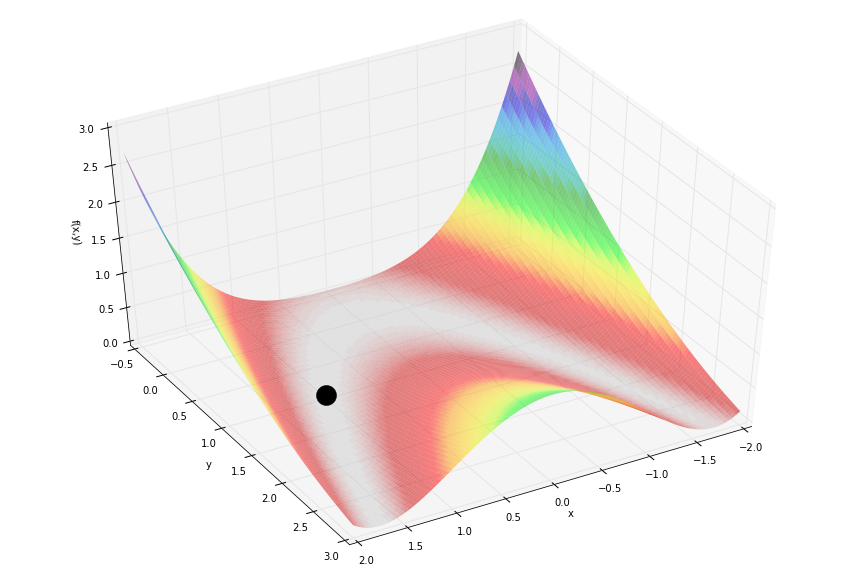

In [14]:
def f(x, y):
    return ((1-x)**2 + 100.*(y-x**2)**2)/750
       
from scipy.optimize import fmin
p0 = [0.75, 1.5]

result = fmin(lambda p: f(p[0], p[1]), p0, full_output=True)
xopt = result[0][0] 
yopt = result[0][1] 
fopt = result[1] 

print('Minimum "{:4.3f}" found at: ({:4.3f}, {:4.3f})'.format(fopt, xopt, yopt))

x = np.linspace(-2.0, 2.0, num=100)
y = np.linspace(-0.5, 3.0, num=100)
X,Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.figure(figsize=(15,10))
ax = plt.subplot(1,1,1, projection='3d')

ax.plot_surface(X, Y, Z, cmap=plt.cm.spectral_r, rstride=1, cstride=1, alpha=.5, linewidth=0)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')

ax.plot3D([xopt], [yopt], [fopt], 'ok', markersize=20)
ax.view_init(elev=45, azim=60)

plt.show()

### Model-fitting

Example: Model-fitting using **leastsq**
- **leastsq(func, x0, args=())**, minimize the residual $|\mathbf{f}(\mathbf{x})|$ of the vector returned by *func*, starting with initial guess *x0*

Example:
- Given noisy data, fit it with the model 
  $$ f(t) = A \sin( \omega t + \theta) $$
  
- Use least squares fitting to minimize the difference between the model and data for the case
    - $A = 1/3$, $\omega = 2.5 \pi$, $\theta = \pi / 5$ 

[ 0.3333  7.854  -0.6283]
[ 0.3216  7.7741 -0.5027]


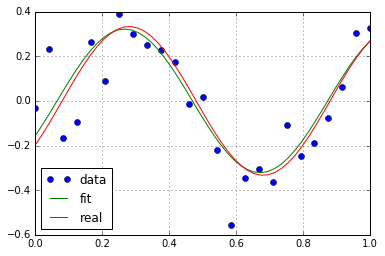

In [15]:
np.set_printoptions(precision=4)

def model(t, A, omega, theta):
    return A * np.sin(omega * t + theta)
    
t = np.linspace(0, 1, num=25)
A, omega, theta = 1./3., 2.5*np.pi, -np.pi/5.
data = model(t, A, omega, theta) + np.random.normal(size=t.shape, scale=0.1)
    
def data_model_diff(params, t, data):
    return model(t, *params) - data
    
p0 = np.array([1.0, 6.0, 0.0])

from scipy.optimize import leastsq

opt_params, flag = leastsq(data_model_diff, p0, args=(t, data))
    
print(np.array([A, omega, theta]))
print(opt_params)
    
t_fine = np.linspace(0,1)

plt.plot(t, data, 'o', label='data')
plt.plot(t_fine, model(t_fine, *opt_params), label='fit')
plt.plot(t_fine, model(t_fine, A, omega, theta), label='real')
    
plt.legend(loc='lower left')
plt.grid()
plt.show()

### Root finding

For finding roots **scipy.optimize** provides:


-   Multi-dimensional: General non-linear solvers
   - **fsolve**, uses MINPACK's hybrd and hybrj algorithms
   - **broyden1**, Broyden's good method
   - **broyden2**, Broyden's bad method

-   Scalar function solvers
   - **newton**, Newton-Raphson or secant method
   - **bisect**, Bisection method on bounded interval
   - **brentq**, **brentf**, **riddler**, other bounded solvers

-   Multi-dimensional: Large-scale non-linear solvers
   - **newton_krylov**, Newton's method with Krylov approximation of inverse Jacobian
   - **anderson**, Extended Anderson mixing method


- Multi-dimensional: Simple solvers
   - **exitingmixing**, Newton with Tuned diagonal Jacobian approx.
   - **linearmixing**, Newton using scalar Jacobian approx.
   - **diagbroyden**, Newton using Broyden Jacobian approx.


Example: Root finding with **fsolve**
   - **fsolve(func, x0)**, solves $f(\mathbf{x}) = 0$ with initial guess $x_0$

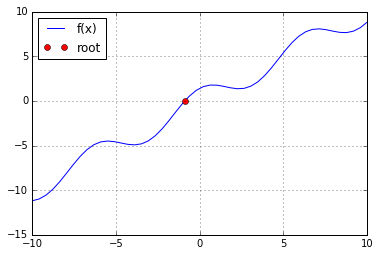

In [16]:
f = lambda x: x + np.sqrt(2) * np.cos(x)

from scipy.optimize import fsolve

x_root = fsolve(f, x0=0.0)
    
x = np.linspace(-10, 10)
    
plt.plot(x, f(x), label='f(x)')
plt.plot(x_root, f(x_root), 'ro', label='root')
plt.legend(loc='best')
plt.grid(True)
plt.show()

## Sparse Matrices

While the NumPy **array** (and **matrix**) datatypes represent full storage, i.e. every element in the array/matrix is stored, whether it is zero or not SciPy provides support for sparse representation of arrays and matrices through **scipy.sparse**

The reason for working with sparse matrices is that matrices with a lot of zero elements can be stored and processed very efficiently by storing only the non-zero elements.

Examples:
- Finite Element Methods (FEM) for continuum mechanics
- Hamiltonian matrices in Many-body Quantum Physics
- etc.

There are several Matrix storage formats available:
   - Compressed Sparse Row (*csr*)
   - Compressed Sparse Column (*csc*)
   - Block Sparse Row (*bsr*)
   - List of Lists (*lil*)
   - Dictionary of Keys (*dok*)
   - Coordinate format (*coo*)
   - Diagonal format (*dia*)

Advice:
   - For matrix construction: use *lil*, supports fancy indexing (as NumPy)
   - For matrix calculations eg. multiplication: use *csr* or *csc* 
   - Conversion from *lil* to *csr* is efficient!

In [17]:
import scipy.sparse as sparse
    
N = 500
A = sparse.rand(N, N, density=0.01, format='csr')
    
loops = 400
t = time.time()
for idx in range(loops):
    B = A * A
print('Sparse mat-mul: {:2.4f} s'.format(time.time() - t))
    
A = A.todense()
    
t = time.time()
for idx in range(loops):
    B = A * A
print('Dense  mat-mul: {:2.4f} s'.format(time.time() - t))

Sparse mat-mul: 0.0958 s
Dense  mat-mul: 0.8778 s


### Sparse Linear Algebra

SciPy provides algorithms for sparse matrices in the **sparse** *Linear Algebra* submodule **scipy.sparse.linalg**

Or in other words, *implicit matrix* Linear algebra routines

-   Iterative linear system solvers for systems like $A\mathbf{x} = \mathbf{b}$
     - **bicg**,  Biconjugate Gradient 
     - **bicgstab**, Biconjugate Gradient Stabilized 
     - **cg**, Conjugate Gradient
     - **cgs**, Conjugate Gradient Squared
     - **gmres**, Generalized Minimal Residual
     - **lgmres**, Improved GMRES
     - **gmr**, Quasi-minimal Residual
     - **lsgr**, Least-squares solver

-   Matrix Factorizations
   - **eigs**, **eigsh**, Eigenvalue and vector calculation
   - **lobpcg**, Symmetric partial eigenproblems (with preconditioning)
   - **svds**, Partial singular value decomposition
   - **splu**, **spilu**, Complete and incomplete LU-factorization


So what are *Implicit Matrices*?

-  The *implicit matrix* algorithms __only__ use the matrix-vector product operation, $Ax$.

- Valid matrix objects are
   - Dense matrices
   - Sparse matrices
   - ~scipy.sparse.linalg.LinearOperator~


Example on an **LinearOperator**:
- The Laplacian operator in 2D, ex. the Diffusion equation:
   $$\nabla^2 f(\mathbf{x}) = \mathbf{b} $$

In [18]:
def Laplacian(f):
    df = np.zeros_like(f)
    df[1:-1, 1:-1] += np.diff(f, n=2, axis=0)[:, 1:-1]
    df[1:-1, 1:-1] += np.diff(f, n=2, axis=1)[1:-1, :]
        
    return df

-   Diffusion equation (Laplacian with rhs)

   $$ \nabla^2 f(\mathbf{x}) = \mathbf{b} $$

-   Observation
   - $f$ and $b$ can be considered as vectors
   - $\nabla^2$ as a linear operator (a matrix)

In [19]:
def get_Laplacian_LinearOperator(grid_shape):
    def matvec(vec):
        f = vec.reshape(grid_shape)
        df = Laplacian(f)
        out_vec = df.flatten()
        return out_vec
    
    from scipy.sparse.linalg import LinearOperator
        
    N = np.prod(grid_shape)
    LaplacianOperator = LinearOperator((N, N), matvec=matvec, dtype=np.float)
    
    return LaplacianOperator

Solve using Conjugate Gradient implicit linear systems solver

source=
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
  -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


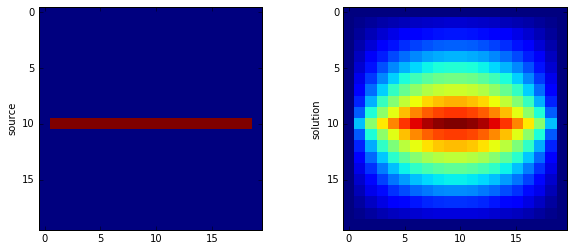

In [20]:
grid_shape = (20, 20)
source = np.zeros(grid_shape)
source[grid_shape[0]/2, 1:-1] = -1.0
b = source.flatten() # RHS vec w. source terms
print('source=\n', source, sep='')
    
f0 = np.zeros(grid_shape)    
v0 = f0.flatten()
    
# -- Solve Lv=b, using CG iterative solver
from scipy.sparse.linalg import cg

L = get_Laplacian_LinearOperator(grid_shape)
print('Laplacian=\n', L)
vsol, err = cg(L, b, x0=v0)
f_steady = vsol.reshape(grid_shape)
        
plt.figure(figsize=plt.figaspect(0.4))
plt.subplot(121)
plt.ylabel('source')
plt.imshow(-source, interpolation='nearest')
    
plt.subplot(122)
plt.ylabel('solution')
plt.imshow(f_steady, interpolation='nearest')
    
plt.show()

### Compressed sparse graphs

For analysing and working with graph-based algorithms, SciPy represents these trees as sparse matrices, and these methods are collected in the **scipy.sparse.csgraph** submodule

The module contains routines for:
* analysing graps (**connected_components**, **laplacian**)
* re-ordering graps (**breadth_first_order**, **depth_first_order**, **breadth_first_tree**, **depth_first_tree**, **minimum_spanning_tree**)
* finding the shortest path through a graph (**shortest_path(csgraph**, **dijkstra**, **floyd_warshall**, **bellman_ford**)

Common for all of these is that the first input to them is a representation of the graph through a *distance/weight matrix*.

This matrix should be of dimension *N x N* where N is the number of nodes in the graph.

For connected nodes i, j, the value at position N[i,j] represent the *distance* or *weight* for this connection.

If nodes i, j are *not* connected this is represented by an empty location in the sparse matrix.


Example: Consider the following undirected graph:

```python
     (0)
    /   \
   0.1   0.2
  /       \
(2)       (1)
```
This graph has three nodes, where node 0 and 1 are connected with a distance of 0.2, and nodes 0 and 2 are connected with a distance of 0.1. We can construct the dense, masked, and sparse representations as follows, keeping in mind that an undirected graph is represented by a symmetric matrix:

In [21]:
G_dense = np.array([[0  , 0.2, 0.1],
                    [0.2, 0  , 0  ],
                    [0.1, 0  , 0  ]])
G_masked = np.ma.masked_values(G_dense, 0)

from scipy.sparse import csr_matrix

G_sparse = csr_matrix(G_dense)

print('Dense:\n', G_dense, sep='')
print('Masked:\n', G_masked, sep='')
print('Sparse:\n', G_sparse, sep='')

Dense:
[[ 0.   0.2  0.1]
 [ 0.2  0.   0. ]
 [ 0.1  0.   0. ]]
Masked:
[[-- 0.2 0.1]
 [0.2 -- --]
 [0.1 -- --]]
Sparse:
  (0, 1)	0.2
  (0, 2)	0.1
  (1, 0)	0.2
  (2, 0)	0.1


## Triangulations, Voronoi-diagrams and convex hulls

In many cases there is a need to construct a mesh or divide a surface into parts given a set of points.

The **scipy.spatial** modules provides methods for:
* Delaunay triangulation in n dimensions: **Delaunay(points, ...)** (i.e. create a mesh based on triangles with the given points as corners)
* Constructing Voronoi-diagrams in n dimensions: **Voronoi(point, ...)** (i.e. divide an surface into parts where each point in a part is closer to the given input-point than to any other input-point)
* Convex hulls in n dimensions: **ConvexHull(points, ...)**

The module provides convenient helpers to plot these in the 2D-case.


Besides the methods above to divide space, **spatial** also contains routines for creating data-structures for fast nearest neighbour lookup, and to compute distance between individual or sets of points.
* **KDTree** and **cKDTRee** (faster C-based implementation) should be given an *N x M* array-like object as input, where *N* is the number of points, and *M* is the spatial dimension of the problem.
* **distance** contains methods for the calculation of distances between points in a given input set (given as an array like above), or between two sets of points.

[[ 0.   0. ]
 [ 0.1  0. ]
 [ 0.2  0.1]
 [ 0.   0.3]]


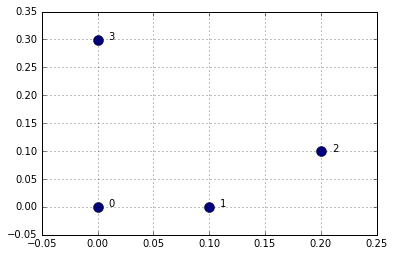

[ 0.1     0.2236  0.3     0.1414  0.3162  0.2828]
  0-1      0-2    0-3      1-2     1-3     2-3


In [22]:
from scipy.spatial import distance

points = np.array([[0.0, 0.0], [0.1, 0.0], [0.2, 0.1], [0.0, 0.3]])
print(points)
plt.plot(points[:,0], points[:,1], 'o', markersize=10, color='Navy')
plt.xlim(-0.05, 0.25)
plt.ylim(-0.05, 0.35)
for i in range(4):
    plt.text(points[i,0]+.01, points[i,1], str(i))
plt.grid()
plt.show()

dists = distance.pdist(points)
print(dists)
print('  0-1      0-2    0-3      1-2     1-3     2-3')

## Statistics

The SciPy statistics module **scipy.stats** contains:
- Continuous distributions
- Discrete distributions
- Statistical functions


Random distributions:
- 80 different continuous distributions
- 10 different discrete distributions

### Continuous Distributions:


<table border="0">
<tr><td> alpha          </td><td>  anglit        </td><td>  arcsine       </td><td>  beta          </td><td>  betaprime        </td></tr>
<tr><td> bradford       </td><td>  burr          </td><td>  cauchy        </td><td>  chi           </td><td>  chi2             </td></tr>
<tr><td> cosine         </td><td>  dgamma        </td><td>  dweibull      </td><td>  erlang        </td><td>  expon            </td></tr>
<tr><td> exponpow       </td><td>  exponweib     </td><td>  f             </td><td>  fatiguelife   </td><td>  fisk             </td></tr>
<tr><td> foldcauchy     </td><td>  foldnorm      </td><td>  frechet\_l    </td><td>  frechet\_r    </td><td>  gamma            </td></tr>
<tr><td> gausshyper     </td><td>  genexpon      </td><td>  genextreme    </td><td>  gengamma      </td><td>  genhalflogistic  </td></tr>
<tr><td> genlogistic    </td><td>  genpareto     </td><td>  gilbrat       </td><td>  gompertz      </td><td>  gumbel\_l        </td></tr>
<tr><td> gumbel\_r      </td><td>  halfcauchy    </td><td>  halflogistic  </td><td>  halfnorm      </td><td>  hypsecant        </td></tr>
<tr><td> invgamma       </td><td>  invgauss      </td><td>  invnorm       </td><td>  invweibull    </td><td>  johnsonsb        </td></tr>
<tr><td> johnsonsu      </td><td>  ksone         </td><td>  kstwobign     </td><td>  laplace       </td><td>  levy             </td></tr>
<tr><td> levy\_l        </td><td>  levy\_stable  </td><td>  loggamma      </td><td>  logistic      </td><td>  loglaplace       </td></tr>
<tr><td> lognorm        </td><td>  lomax         </td><td>  maxwell       </td><td>  mielke        </td><td>  nakagami         </td></tr>
<tr><td> ncf            </td><td>  nct           </td><td>  ncx2          </td><td>  norm          </td><td>  pareto           </td></tr>
<tr><td> powerlaw       </td><td>  powerlognorm  </td><td>  powernorm     </td><td>  rayleigh      </td><td>  rdist            </td></tr>
<tr><td> recipinvgauss  </td><td>  reciprocal    </td><td>  rice          </td><td>  semicircular  </td><td>  t                </td></tr>
<tr><td> triang         </td><td>  truncexpon    </td><td>  truncnorm     </td><td>  tukeylambda   </td><td>  uniform          </td></tr>
<tr><td> vonmises       </td><td>  wald          </td><td>  weibull\_max  </td><td>  weibull\_min  </td><td>  wrapcauchy       </td></tr>
</table>

Discrete Distributions:

<table border="0">
<tr><td> bernoulli  </td><td>  binom    </td><td>  boltzmann  </td><td>  dlaplace  </td><td>  geom     </td></tr>
<tr><td> hypergeom  </td><td>  logser   </td><td>  nbinom     </td><td>  planck    </td><td>  poisson  </td></tr>
<tr><td> randint    </td><td>  skellam  </td><td>  zipf       </td><td>            </td><td>           </td></tr>
</table>


Continuous Distributions Interface:

-   Parameters, defined in the **shapes** method.

   
-   Methods implemented by all continuous distributions **rvs(N)**, draw *N* Random Value Samples
   - **pdf(x)**, Probability Distribution Function
   - **cdf(x)**, Cumulative Distribution Function
   - **sf(x)**, Survival Function $(1-\textrm{cdf}(x))$


   - **ppf(y)**, Percent Point Function $\textrm{cdf}^{-1}(y)$
   - **isf(y)**, Inverse Survival Function $\textrm{isf}^{-1}(y)$


- **stats(..)**, mean, variance, skew or kurtois?
   - **moment(n)**, n:th order moment of distribution


-   Distribution parameter estimators

   - **fit(data)**, Maximum likely hood estimation of distribution parameters from *data*

   - **fit_loc_scale(data)**, fit only *location* and *scale* w. fixed *shape*

   - **expect(func=f)**,  expected value of function wrt. the distribution



Example - Non-central Student T distribution 

   - **scipy.stats.nct**


In [23]:
from scipy import stats

print('Parameters:', stats.nct.shapes)
print()
help(stats.nct)

Parameters: df, nc

Help on nct_gen in module scipy.stats._continuous_distns object:

class nct_gen(scipy.stats._distn_infrastructure.rv_continuous)
 |  A non-central Student's T continuous random variable.
 |  
 |  %(before_notes)s
 |  
 |  Notes
 |  -----
 |  The probability density function for `nct` is::
 |  
 |                                          df**(df/2) * gamma(df+1)
 |      nct.pdf(x, df, nc) = ----------------------------------------------------
 |                           2**df*exp(nc**2/2) * (df+x**2)**(df/2) * gamma(df/2)
 |  
 |  for ``df > 0``.
 |  
 |  `nct` takes ``df`` and ``nc`` as shape parameters.
 |  
 |  %(after_notes)s
 |  
 |  %(example)s
 |  
 |  Method resolution order:
 |      nct_gen
 |      scipy.stats._distn_infrastructure.rv_continuous
 |      scipy.stats._distn_infrastructure.rv_generic
 |      builtins.object
 |  
 |  Methods inherited from scipy.stats._distn_infrastructure.rv_continuous:
 |  
 |  __init__(self, momtype=1, a=None, b=None, xtol=1

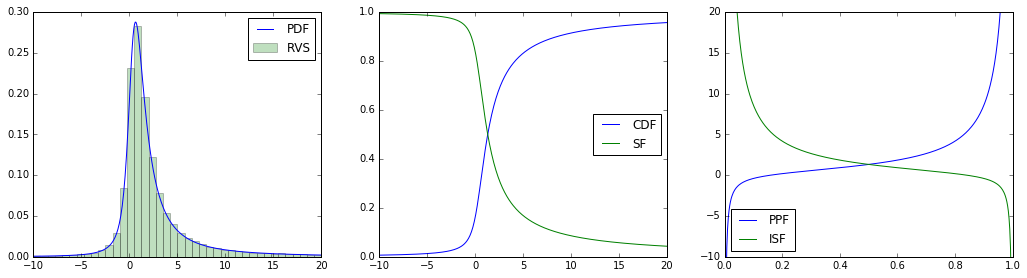

In [24]:
    df = 1.0; nc = 1.0
    n = stats.nct(df, nc)
    x = np.linspace(-10, 20, num=400)
    y = np.linspace(0, 1, num=400)
    
    plt.figure(figsize=plt.figaspect(0.25))
    
    plt.subplot(131)
    plt.plot(x, n.pdf(x), label='PDF'); 
    plt.hist(n.rvs(1e5), bins=40, normed=True, alpha=0.25, range=(np.min(x), np.max(x)), label='RVS'); 
    plt.legend()

    plt.subplot(132)
    plt.plot(x, n.cdf(x), label='CDF')
    plt.plot(x, n.sf(x),  label='SF')
    plt.legend(loc='best')
    
    plt.subplot(133)
    plt.plot(y, n.ppf(y), label='PPF')
    plt.plot(y, n.isf(y), label='ISF')
    plt.legend(loc='best')
    plt.ylim([np.min(x), np.max(x)])
    
    plt.subplots_adjust(bottom=.1, top=.95, left=.1, right=.95)
    plt.show()        

## Signal Processing

The Signal Processing Toolbox **scipy.signal**
   
Components:
   - Convolution, in 2 and N-dimensions
   - B-spline interpolation algorithms, specialized for equally-spaced data
   - Filtering functions
   - Filter design
   - Window functions
   - Wavelets
   - Peak finding
   

### The Signal Processing Toolbox - Convolution

From Wikipedia:

"In mathematics and, in particular, functional analysis, convolution is a mathematical operation on two functions f and g, producing a third function that is typically viewed as a modified version of one of the original functions, giving the area overlap between the two functions as a function of the amount that one of the original functions is translated."


- Question: Can we do the 2D Laplacian faster by a convolution?

In [25]:
from scipy.signal import convolve, fftconvolve

f = np.random.random((1000, 1000))
stencil = np.array([[0., 1., 0.],
                    [1.,-4., 1.],
                    [0., 1., 0.]])
t = time.time()
fnabla2 = convolve(f, stencil, mode='valid')
print('convolve:     {:4.3f} s  '.format(time.time() - t))

t = time.time()
fnabla2_fft = fftconvolve(f, stencil, mode='valid')
print('FFT convolve: {:4.3f} s  '.format(time.time() - t))

t = time.time()
Nabla2f = np.zeros(np.array(f.shape) - np.array([1, 1]))
Nabla2f = f[2:, 1:-1] + f[0:-2, 1:-1] + f[1:-1, 2:] + f[1:-1, 0:-2] - 4 * f[1:-1, 1:-1]
print('plain NumPy:  {:4.3f} s  '.format(time.time() - t))
     
np.testing.assert_array_almost_equal(fnabla2, fnabla2_fft)
np.testing.assert_array_almost_equal(fnabla2, Nabla2f)

convolve:     0.160 s  
FFT convolve: 0.118 s  
plain NumPy:  0.015 s  


- Question: Why do the performance degrade?


Example: convolution, Wiener filter, B-spline fit and edge detection

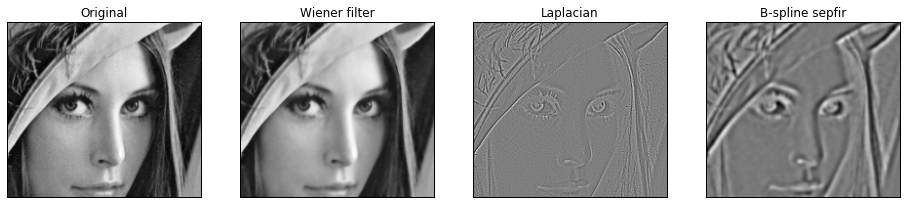

In [26]:
from scipy.misc import lena
import scipy.signal as signal
    
image = lena()[180:360, 200:400]

laplacian = np.array([[0, 1, 0],
                      [1,-4, 1],
                      [0, 1, 0]], dtype=np.float)

deriv2 = signal.convolve2d(image, laplacian, mode='same',boundary='symm')

wiener = signal.wiener(image)
        
derfilt = np.array([1, -2, 1], dtype=np.float)
ck = signal.cspline2d(image,8.0)
deriv = signal.sepfir2d(ck, derfilt, [1]) + signal.sepfir2d(ck, [1], derfilt)            

import matplotlib.cm as cm
plt.figure(figsize=plt.figaspect(0.25))
    
data_list = [image, wiener, deriv2, deriv]
title_list = ['Original', 'Wiener filter', 'Laplacian', 'B-spline sepfir']
ax = None
for idx, (data, title) in enumerate(zip(data_list, title_list)):
    plt.subplot(1, 4, idx+1)
    plt.title(title)
    plt.imshow(data, cmap=cm.gray)
    plt.xticks([]); plt.yticks([])
    plt.axis('image')
    
plt.show()

## Multi-dimensional image processing

The SciPy multi-dimensional image processing module **scipy.ndimage** provides methods to work on "Images" with n-dimensions, eg. MRI etc.

It provides:
- Filter functions
- Correlation
- Convolution
- Derivatives
- Spline pre-filters


For more information, consult the online-documentation at http://docs.scipy.org/doc/scipy/reference/tutorial/ndimage.html

## File I/O

The **scipy.io** module contains the extra I/O routines:
- **loadmat(fname)**, load MATLAB *.mat* data file
- **savemat(fname, dict)**, save dictionary of names and arrays to MATLAB *.mat*-file

- **readsav(fname)**, read IDL *.sav*-files

- **wavfile.read(file)**, read *.wav* sound file
- **wavfile.write(fname, rate, data)**, write *.wav* sound file

- **arff.loadarff(file)**, Load an ARFF file standard format for WEKA
  (Weka is a collection of machine learning algorithms for data mining tasks)

- **netcdf.netcdf_file(fname)**, read a NetCDF file.

##  Extra example - The Quantum Mechanical Harmonic Oscillator

Schroedinger equation in 1D
   
$$ \left[-\frac{\hbar^2}{2m} \frac{d^2}{dx^2} + V(x) \right] \Psi(x) = E \Psi(x) $$


where $V(x) = x^2$ and $\hbar/2m = 1$


$$ \frac{d^2}{dx^2} \Psi(x) \approx \frac{\Psi( x_{i+1}) - 2\Psi(x_i) + \Psi(x_{i-1})}{(\Delta x)^2} $$

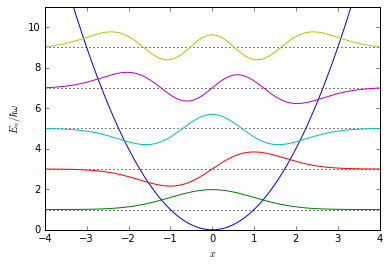

In [27]:
    N = 300
    x = np.linspace(-4.0, 4.0, num=N)
    dx = x[1] - x[0]
    
    d2_dx2 = - np.array([1., -2., 1.]) / dx**2
    H_diags = np.zeros((3, N)) + d2_dx2[:, np.newaxis]   
    H_diags[1, :] += x**2 # Add potential on middle diagonal
    
    H = sparse.spdiags(H_diags, [-1,0,1], N, N).tocsr()
    
    import scipy.sparse.linalg as splinalg

    eigv, eigvec = splinalg.eigsh(H, 5, which='SM', tol=1e-4, maxiter=10*N)

    plt.plot(x, x**2)

    for idx in range(eigvec.shape[-1]):
        plt.plot(x, eigv[idx]+np.zeros_like(x), ':k')
        plt.plot(x, 8*np.ravel(eigvec[:, idx]) + eigv[idx])
        plt.ylim([0, eigv[-1]+2])

        plt.ylabel(r'$E_n / \hbar \omega$')
    plt.xlabel(r'$x$')

    plt.show()